<a href="https://colab.research.google.com/github/mzengin/randomtests/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

Let's create some data for classification task

In [5]:
x1 = np.random.random_sample((50,2)) * 10 + np.random.random_sample((50,2)) * 2

In [6]:
x2 = np.random.random_sample((50,2)) * 5 - np.random.random_sample((50,2)) * 2

In [4]:
import matplotlib.pyplot as plt


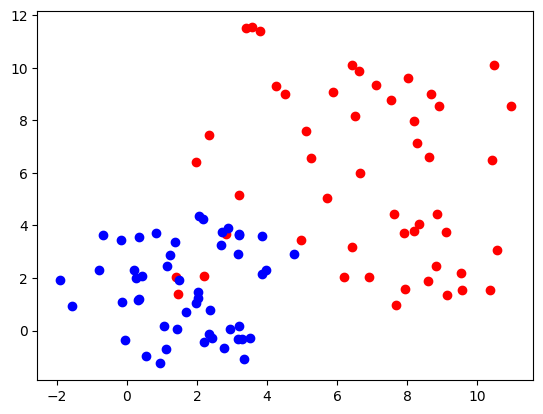

In [13]:
plt.scatter(x1[:,0], x1[:,1], c='red')
plt.scatter(x2[:,0], x2[:,1], c='blue')
plt.show()

In [15]:
X = np.vstack((x1, x2))

In [16]:
y = np.vstack((np.ones((50,1)), np.zeros((50,1))))

Not good! Let's get shuffled version of it

In [20]:
selected_indices = np.random.choice(np.arange(0,100), size=100, replace=False)

In [22]:
X = X[selected_indices]
y = y[selected_indices]

In [24]:
train_X = X[:75]
train_y = y[:75]
test_X = X[75:]
test_y = y[75:]

In [45]:
class LogisticRegression:
  def __init__(self):
    pass

  def sigmoid(self, val):
    return 1/(1 + np.exp(-val))

  def predict(self, X):
    X = np.hstack((X, np.ones((X.shape[0], 1))))
    return self.sigmoid(np.dot(X, self.theta))

  def loss(self, prediction, y):
    return (-1/prediction.shape[0]) * np.sum(y * np.log(prediction) + (1-y) * np.log(1-prediction))

  def fit(self, X, y, lr = 1e-2, iteration=100):
    m = X.shape[0]
    n = X.shape[1] + 1

    self.theta = np.random.random_sample((n, 1))
    # theta dimension is n by 1
    print(X.shape)

    X = np.hstack((X, np.ones((m, 1))))
    print(X.shape)
    # X dimension is m by n
    loss_arr = []
    for i in range(iteration):
      # train her
      prediction = self.sigmoid(np.dot(X, self.theta))
      loss_v = self.loss(prediction, y)
      if i%100 == 0:
        print(f"Iteration {i}, cost: {loss_v}")
      loss_arr.append(loss_v)
      # prediction m by 1
      residual = prediction - y
      self.theta = self.theta - lr * np.dot(X.T, residual)

    return loss_arr

In [46]:
log_res = LogisticRegression()

In [47]:
loss_r = log_res.fit(train_X, train_y, 0.01, 1000)

(75, 2)
(75, 3)
Iteration 0, cost: 0.5889773402338527
Iteration 100, cost: 0.22859359673054983
Iteration 200, cost: 0.2233935966271381
Iteration 300, cost: 0.22253156155327353
Iteration 400, cost: 0.22234206931754344
Iteration 500, cost: 0.2222956133909727
Iteration 600, cost: 0.22228364339612072
Iteration 700, cost: 0.22228048338268827
Iteration 800, cost: 0.2222796388918468
Iteration 900, cost: 0.22227941179079888


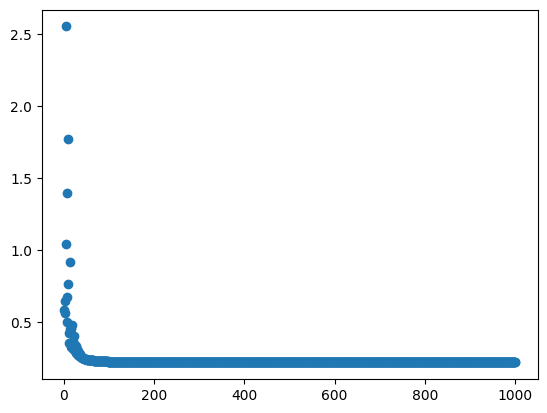

In [48]:
plt.scatter(np.arange(1, len(loss_r)+1), loss_r)

In [51]:
log_res.predict(test_X)

array([[0.98545068],
       [0.97018374],
       [0.0650056 ],
       [0.99884948],
       [0.70966658],
       [0.03368054],
       [0.46122872],
       [0.84329488],
       [0.98888885],
       [0.98895894],
       [0.59094415],
       [0.97573047],
       [0.95799194],
       [0.9437599 ],
       [0.99956286],
       [0.44459041],
       [0.99884011],
       [0.00482363],
       [0.07079033],
       [0.09764104],
       [0.12013568],
       [0.99812903],
       [0.03591748],
       [0.00463435],
       [0.99885476]])

In [52]:
test_y

array([[1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.]])